$\hspace{95mm}$ <img src="https://drive.google.com/uc?id=1v2mM0flAevZW8GoOCI564cJ2Szz5SPA-" alt="uoa" width="450" height="300">




---
$ $

ΘΠ11 - Υπολογιστική Γεωμετρία
$ $

Παναγιώτα Γύφτου, Α.Μ 1115201900318
$ $

Φεβρουάριος 2024

$ $

---




In [ ]:
from scipy.spatial import ConvexHull
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import time


##**Υλοποίηση Α:** $ $ Κυρτό περίβλημα

1. Να υλοποιήσετε 2 αλγορίθμους της επιλογής σας για την εύρεση κυρτού
περιβλήματος ενός πεπερασμένου συνόλου σημείων στο επίπεδο.

**Υλοποίηση Α**: Αυξητικός αλγόριθμος - Graham’s Scan

In [90]:
def remove_duplicates(points: list) -> list:
    unique_points = []
    seen = set()
    for p in points:
        if p not in seen:
            unique_points.append(p)
            seen.add(p)
    return unique_points

def sort(points: list) -> list:

  # Ταξινόμηση της λίστας σύμφωνα με τις τιμές του x
  sorted_list = sorted(points, key=lambda x: x[0])

  return sorted_list

def determinant(p1: tuple, p2: tuple, p3: tuple, visualization: bool = False) -> int:

    if visualization:
        print(f"\nWe are checking the rotation of")
        print(f"p1:{p1}, p2:{p2}, p3:{p3}")

    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3

    det = -(x1 * (y2 - y3) - x2 * (y1 - y3) + x3 * (y1 - y2))

    if visualization:
        print(f"\n    | 1 \t {p1[0]} \t {p1[1]} \t|")
        if det > 0:
            print(f"det | 1 \t {p2[0]} \t {p2[1]} \t| = {det} > 0")
        elif det < 0:
            print(f"det | 1 \t {p2[0]} \t {p2[1]} \t| = {det} < 0")
        else:
            print(f"det | 1 \t {p2[0]} \t {p2[1]} \t| = {det} = 0")
        print(f"    | 1 \t {p3[0]} \t {p3[1]} \t|\n")

    return det

def GrahamScan(points: list, visualization: bool = False) -> list:

  if visualization:
    print(f"\nInput: {points}")

  points = remove_duplicates(points)

  # 1. Διατάσσουμε τα σημεία κατά αύξουσα λεξικογραφική διάταξη. ΄Εστω p1, . . . , pn η ακολουθία των σημείων που προκύπτει
  sorted_points = sort(points)

  if visualization:
    print(f"\nFirstly, we arrange the points lexicographically: {sorted_points}")

  # 2. Εισάγουμε τα σημεία p1 και p2, με αυτήν τη σειρά, σε έναν νέο κατάλογο Lάνω
  Lup = sorted_points[:2]

  # 3.
  for i in range(2, len(sorted_points)):

    # 4. Προσθέτουμε το pi στον κατάλογο Lάνω.
    Lup.append(sorted_points[i])

    if visualization:
      print(f"\nWe consider in the upper envelope:\n")
      printConvexHull(Lup)


    # 5. Οσο ο Lάνω περιέχει περισσότερα από δύο σημεία και η στροφή που ορίζουν τα τρία τελευταία από αυτά δεν είναι δεξιά
    while(len(Lup) > 2):

      det = determinant(Lup[-1], Lup[-2], Lup[-3], visualization)

      if det > 0:
          # 6. Αφαιρούμε από τον Lάνω το μεσαίο από τα τρία τελευταία σημεία του
          if visualization:
              print(f"So, p1, p2, p3 define positive direction and thus p2 = {Lup[-2]} is subtracted from Lup.\n")
          Lup.pop(-2)
      elif det == 0:
          # Αν τα τρία σημεία είναι συνευθειακά, αφαιρούμε το μεσαίο
          if visualization:
              print(f"The points p1, p2, p3 are collinear, thus p2 = {Lup[-2]} is subtracted from Lup.\n")
          Lup.pop(-2)
      else:
          break

    if visualization:
      print("Therefore, the last 3 points define a negative trend, so we will keep all 3 points.\n")


  # 7. Εισάγουμε τα σημεία pn και pn−1, με αυτήν τη σειρά, σε έναν νέο κατάλογο Lκάτω.
  Ldown = []
  Ldown.append(sorted_points[-1])
  Ldown.append(sorted_points[-2])

  # 8. για i ← n − 2 : −1 : 1
  for i in range(len(sorted_points)- 3, -1, -1):

    # 9. Προσθέτουμε το pi στον κατάλογο Lκάτω.
    Ldown.append(sorted_points[i])

    # 10. ΄Οσο ο Lκάτω περιέχει περισσότερα από δύο σημεία και η στροφή που ορίζουν τα τρία τελευταία από αυτά δεν είναι δεξιά
    while(len(Ldown) > 2):

      det = determinant(Ldown[-1], Ldown[-2], Ldown[-3], visualization)

      if det > 0:
          # 11. Αφαιρούμε από τον Lκάτω το μεσαίο από τα τρία τελευταία σημεία του
          if visualization:
              print(f"So, p1, p2, p3 define positive direction and thus p2 = {Ldown[-2]} is subtracted from Lup.\n")
          Ldown.pop(-2)
      elif det == 0:
          # Αν τα τρία σημεία είναι συνευθειακά, αφαιρούμε το μεσαίο
          if visualization:
              print(f"The points p1, p2, p3 are collinear, thus p2 = {Ldown[-2]} is subtracted from Lup.\n")
          Ldown.pop(-2)
      else:
          break


  # 12. Αφαιρούμε από τον Lκάτω το πρώτο και το τελευταίο σημείο του, ώστε να αποφύγουμε τη διπλή καταχώριση των κορυφών στις οποίες συναρμόζονται το άνω και το κάτω περίβλημα
  del Ldown[0]
  del Ldown[-1]

  # 13. Επισυνάπτουμε τον Lκάτω στον Lάνω. ΄Εστω L ο κατάλογος που προκύπτει.
  L = Lup + Ldown

  return L


$ $

**Υλοποίηση Β** : Αλγόριθμος ‘‘περιτυλίγματος’’ (Gift wrapping)  

In [91]:
def CW(u: tuple, r: tuple, t: tuple) -> bool:

  # Υπολογισμός προσανατολισμού με βάση τον κανόνα του Χάμιλτον
  cross_product = (u[0] - r[0]) * (t[1] - r[1]) - (u[1] - r[1]) * (t[0] - r[0])
  # Αν το γινόμενο είναι θετικό, τότε τα σημεία r, u, t περιστρέφονται αριστερόστροφα (CW)
  if cross_product > 0: return True

  return False


def collinear(u: tuple, r: tuple, t: tuple) -> bool:
    # Υπολογισμός προσανατολισμού με βάση τον κανόνα του Χάμιλτον
    cross_product = (u[0] - r[0]) * (t[1] - r[1]) - (u[1] - r[1]) * (t[0] - r[0])
    # Αν το γινόμενο είναι θετικό, τότε τα σημεία r, u, t περιστρέφονται αριστερόστροφα (CW)
    if cross_product == 0:
        return True
    else:
        return False


def is_point_inside_segment(u: tuple, r: tuple, t: tuple) -> bool:

  # Έλεγχος αν το u είναι εντός του ευθύγραμμου τμήματος rt
  if min(r[0], t[0]) <= u[0] <= max(r[0], t[0]) and min(r[1], t[1]) <= u[1] <= max(r[1], t[1]): return True

  return False


def GiftWrapping(points: list) -> list:

  points = remove_duplicates(points)

  # 1. Αρχικοποίησε την τρέχουσα κορυφή r = r0, όπου το σημείο r0 έχει την ελάχιστη τετμημένη.
  #    Αν υπάρχουν περισσότερα από ένα τέτοια σημεία, επίλεξε το λεξικογραφικά μικρότερο, δηλαδή αυτό με την ελάχιστη τεταγμένη.
  r = r0 = min(points, key=lambda point: (point[1], point[0]))

  chain = []
  while True:

    # 2. Αρχικοποίησε την αλυσίδα κορυφών με το r
    chain.append(r)

    # 3. ΄Εστω r η τρέχουσα κορυφή και u ∈ points ένα οποιοδήποτε σημείο που δεν έχει επιλεγεί ως κορυφή.
    u = max(points, key=lambda point: (point[1], point[0]))

    # Για κάθε σημείο t ∈ points \ {u}, δηλαδή δεν ανήκει στο σύνολο των γνωστών κορυφών,
    for t in points:

      # αν ισχύει CW(r, u, t), ή αν τα r, u, t είναι συνευθειακά και το u είναι εσωτερικό σημείο του ευθύγραμμου τμήματος rt, τότε θέσε u ← t.
      if CW(r, u, t) or (collinear(r, u, t) and is_point_inside_segment(u, r, t)): u = t


    # 4. Αν ισχύει u = r0 τερμάτισε, αλλιώς: r ← u, S ← S \ {r}, πρόσθεσε στην αλυσίδα κορυφών το r, συνέχισε στο Βήμα 3
    if u == r0:
      return chain
    else:
        r = u


$ $

2. $ $  Πώς συμπεριφέρονται οι παραπάνω αλγόριθμοι σε εκφυλισμένες περιπτώσεις;


**Υλοποίηση Α: $ $Ο αυξητικός αλγόριθμος - Graham’s Scan** χειρίζεται εκφυλισμένες περιπτώσεις μέσω διαφορετικών μηχανισμών που ενσωματώνονται στις διάφορες συναρτήσεις του. Πιο συγκεκριμένα:

1. **Αφαίρεση διπλοτύπων (`remove_duplicates`)**: Η συνάρτηση αυτή εξασφαλίζει ότι κάθε σημείο εμφανίζεται μόνο μία φορά στη λίστα, αποφεύγοντας την επεξεργασία των ίδιων σημείων πολλαπλές φορές. Αυτό βοηθάει στην πρόληψη εκφυλισμένων περιπτώσεων όπου τα ίδια σημεία εισάγονται πολλαπλές φορές.

2. **Ταξινόμηση σημείων (`sort`)**: Η ταξινόμηση των σημείων αυξανόμενα βάσει του άξονα x διασφαλίζει ότι η επεξεργασία των σημείων γίνεται με σειρά που βοηθάει στην αποφυγή εκφυλισμένων καταστάσεων που θα μπορούσαν να προκύψουν από τυχαία διάταξη των σημείων.

3. **Έλεγχος κατεύθυνσης (`determinant`)**: Η συνάρτηση αυτή χρησιμοποιεί τον προσδιοριστή για να ελέγξει την κατεύθυνση της στροφής μεταξύ τριών σημείων. Εάν ο προσδιοριστής είναι μηδέν, σημαίνει ότι τα σημεία είναι συνευθειακά, τότε αφαιρείται το μεσαίο σημείο.

4. **Αφαίρεση εκφυλισμένων καταστάσεων κατά τη διάρκεια της δημιουργίας του περιβλήματος (`GrahamScan`)**: Κατά τη δημιουργία του περιβλήματος, ο αλγόριθμος συνεχώς ελέγχει και αφαιρεί σημεία που δεν συμβάλλουν στην εξωτερική γραμμική διαδρομή, διασφαλίζοντας ότι δεν θα παραμείνουν εσωτερικά σημεία που μπορεί να οδηγήσουν σε εκφυλισμένες καταστάσεις.

Συνοψίζοντας, ο αλγόριθμος αντιμετωπίζει εκφυλισμένες περιπτώσεις μέσω της αφαίρεσης διπλοτύπων, της επεξεργασίας για την αφαίρεση συνευθειακών σημείων, και του ελέγχου για τη διατήρηση μόνο των σημείων που συνθέτουν το εξωτερικό περίβλημα, αποφεύγοντας έτσι τις εκφυλισμένες καταστάσεις που μπορεί να προκύψουν από την επεξεργασία μη χρήσιμων σημείων.


$ $

$ $

**Υλοποίηση Β: $ $ Ο αλγόριθμος ‘‘περιτυλίγματος’’ (Gift wrapping)** χειρίζεται εκφυλισμένες περιπτώσεις μέσω των ακόλουθων τεχνικών:

1. **Προσανατολισμός και Συνευθειακότητα (Συναρτήσεις `CW` και `collinear`)**: Ο αλγόριθμος χρησιμοποιεί τον υπολογισμό του διανυσματικού γινομένου για να καθορίσει τον προσανατολισμό τριών σημείων (δεξιόστροφο, αριστερόστροφο) και να εντοπίσει αν είναι συνευθειακά. Αυτό είναι κρίσιμο για να αποφευχθούν προβλήματα όταν τα σημεία είναι σε μια ευθεία γραμμή, επιτρέποντας στον αλγόριθμο να αναγνωρίζει και να αντιμετωπίζει αυτές τις εκφυλισμένες περιπτώσεις.

2. **Έλεγχος Θέσης Σημείου Εντός Τμήματος (Συνάρτηση `is_point_inside_segment`)**: Με την χρήση της λογικής για να ελέγχει αν ένα σημείο βρίσκεται εντός ενός ευθύγραμμου τμήματος, ο αλγόριθμος αντιμετωπίζει καταστάσεις όπου ένα σημείο που θα μπορούσε να θεωρηθεί ως επόμενη κορυφή είναι πραγματικά μέσα στο τμήμα που σχηματίζεται από τα τρέχοντα σημεία της αλυσίδας. Αυτό βοηθάει στην αποφυγή της επιλογής εσωτερικών σημείων που δεν πρέπει να αποτελούν μέρος του τελικού περιβλήματος.

3. **Επιλογή Αρχικού Σημείου (Αρχή του αλγορίθμου)**: Η επιλογή του αρχικού σημείου βασίζεται στην ελάχιστη τετμημένη (και ενδεχομένως τεταγμένη για την αποφυγή αμφιβολιών). Αυτό εξασφαλίζει ένα σταθερό και προβλέψιμο σημείο εκκίνησης για την διαδικασία του Gift Wrapping, αποφεύγοντας πιθανές περιπτώσεις όπου η επιλογή ενός άλλου σημείου θα μπορούσε να οδηγήσει σε εκφυλισμένες καταστάσεις.

4. **Επαναληπτική Διαδικασία για Εύρεση Κορυφών (Κύριος Βρόχος)**: Ο αλγόριθμος συνεχίζει να επιλέγει το επόμενο σημείο που μεγιστοποιεί την αριστερόστροφη στροφή (ή είναι συνευθειακό αλλά όχι εσωτερικό σημείο) ως επόμενη κορυφή της αλυσίδας. Αυτή η διαδικασία εξασφαλίζει την αποφυγή εσωτερικών σημείων και την κατασκευή ενός εξωτερικού περιβλήματος που περιλαμβάνει όλα τα σημεία.

5. **Αφαίρεση διπλοτύπων (`remove_duplicates`)**: Η συνάρτηση αυτή εξασφαλίζει ότι κάθε σημείο εμφανίζεται μόνο μία φορά στη λίστα, αποφεύγοντας την επεξεργασία των ίδιων σημείων πολλαπλές φορές. Αυτό βοηθάει στην πρόληψη εκφυλισμένων περιπτώσεων όπου τα ίδια σημεία εισάγονται πολλαπλές φορές.

Μέσω αυτών των τεχνικών, ο αλγόριθμος αντιμετωπίζει κατάλληλα τις εκφυλισμένες περιπτώσεις, όπως συνευθειακά σημεία και διπλότυπα.


$ $

$  $

3. $ $Μπορούν οι 2 αλγόριθμοι που έχετε επιλέξει να γενικευτούν σε περισσότερες από 3 διαστάσεις; Σχολιάστε την απάντησή σας (αν γίνεται, τον
τρόπο που μπορεί να γίνει, διαφορετικά γιατί δεν μπορεί να γίνει).

**Υλοποίηση Α: $ $Ο αυξητικός αλγόριθμος - Graham’s Scan** Η επέκταση του αλγορίθμου Graham's Scan σε τρεις διαστάσεις είναι προβληματική και την καθιστά αδύνατη, λόγω της φύσης του αλγορίθμου που βασίζεται στην ταξινόμηση των σημείων. Σε τρεις διαστάσεις, οι έννοιες της αριστερόστροφης στροφής και της συνεχούς σάρωσης για την εύρεση του επόμενου σημείου δεν είναι άμεσα εφαρμόσιμες, καθώς ο χώρος δεν είναι πλέον επίπεδος αλλά τρισδιάστατος.

$ $

**Υλοποίηση Β: $ $ Ο αλγόριθμος ‘‘περιτυλίγματος’’ (Gift wrapping)** Μπορεί να επεκταθεί σε υψηλότερες διαστάσεις με την έννοια ότι η διαδικασία "αναζήτησης για το επόμενο σημείο" μπορεί να γενικευτεί για να λειτουργήσει σε επίπεδα, τρισδιάστατους χώρους, και ούτω καθεξής. Ο αλγόριθμος πρέπει να εντοπίζει τώρα επιφάνειες (όχι μόνο γραμμές).Παρακάτω παρουσιάζεται ο αλγόριθμος Jarvis 3 διαστάσεων

$ $

$ $


---


Αλγόριθμος: Συνάρτηση ΑΛΛΗ-ΕΦΑΡ Που για αναζήτηση περιττώγματος)

---

$\bullet$ Είσοδος: Ρύξη R και χωρισή c ∉ R ∪ {c} να αποτελεί έδρα του ΚΠΣ.

$\bullet$ Έξοδος: Έδρα ΚΠΣ που περιέχει την Ρ και δεν είναι η R ∪ {c}.

$ $

1. Έστω υποψήφιο σημείο u από τα σημεία εισόδου, εκτός των R ∪ {c}.

2. Για κάθε t ∉ R ∪ {c, u}:

$\hspace{10mm}$ Αν c, t σε διαφορετικούς πληγώρους ως προς το υπερπλήρειο της υπόμορφης έδρας R ∪ {u} => u ← t.

$ $

3. Επίστρεψε την έδρα R ∪ {u}.

$ $

$ $

Η διαδικασία με απλά λόγια που περιγράφεται στον ψευδοκώδικα:

Ξεκινώντας από μια δεδομένη συλλογή σημείων και μια είσοδο που αποτελεί μια έδρα (σημείο αναφοράς) του κυρτού πολυεδρικού συστήματος (ΚΠΣ), ο αλγόριθμος αναζητά ένα υποψήφιο σημείο (u) που δεν ανήκει στο σύνολο της αρχικής έδρας προσθέτοντας ένα στοιχείο c.

Στη συνέχεια, για κάθε άλλο σημείο (t) που δεν ανήκει στο σύνολο της αρχικής έδρας μαζί με το υποψήφιο σημείο u και το στοιχείο c, ελέγχεται αν το c και το t βρίσκονται σε διαφορετικές πλευρές ως προς το υπερπλήρες της υπόμορφης έδρας που δημιουργείται από την αρχική έδρα συν το σημείο u. Αν αυτό συμβαίνει, τότε το υποψήφιο σημείο u αντικαθίσταται με το σημείο t.

Τέλος, ο αλγόριθμος επιστρέφει τη νέα έδρα που περιλαμβάνει το αρχικό σύνολο σημείων R συν το τελικό υποψήφιο σημείο u, το οποίο έχει επιλεγεί μετά την παραπάνω διαδικασία.

#### **Εφαρμογή Α**

1. $ $ Θεωρείστε 85 τυχαία σημεία στο επίπεδο.

**(αʹ)** Να βρεθεί το κυρτό περίβλημα αυτών των σημείων χρησιμοποιώντας
τους 2 αλγορίθμους που έχετε υλοποιήσει. Να παρουσιάσετε τα
αποτελέσματα σαν λίστα σημείων και σχηματικά.

$ $

- Βοηθητικές Συναρτήσεις

In [92]:
def plotting(convexHull: list, auxiliary_list: list, title: str):

  points = np.array(auxiliary_list)

  plt.figure(figsize=(10, 6))

  plt.plot(points[:,0], points[:,1], 'o', color='gray')

  # Λίστα από tuples με τις συντεταγμένες των σημείων
  polygon_points = convexHull

  # Προσθέτουμε το πρώτο σημείο στο τέλος για να κλείσει η πολυγωνική γραμμή
  polygon_points.append(polygon_points[0])

  # Αποσπούμε τις x και y συντεταγμένες από τα tuples
  x = [point[0] for point in polygon_points]
  y = [point[1] for point in polygon_points]

  # Σχεδίαση της κλειστής πολυγωνικής γραμμής
  plt.plot(x, y, color='purple')
  plt.title(title)

  # Εμφάνιση του plot
  plt.show()


def printConvexHull(convexHull: list):

  for point in convexHull:
    print(point)



$ $

- Δημιουργία σετ ζευγών 2Δ συντεταγμένων

In [93]:
def createSet(size: int) -> list:
  np.random.seed(318)

  auxiliary_list = []
  for _ in range(size):

    x = np.random.random()
    y = np.random.random()

    auxiliary_list.append((x,y))

  return auxiliary_list

$ $

**Αυξητικός αλγόριθμος - Graham’s Scan**

---



(0.010229507615277078, 0.031121854774366242)
(0.014944131389534654, 0.47644294727742065)
(0.02424536517655429, 0.7461965343320632)
(0.10659738632441573, 0.8928723892687994)
(0.2774965994213844, 0.9929411955466686)
(0.856892398205928, 0.9958295313710828)
(0.9797510462536426, 0.6031650698132945)
(0.9975282868395074, 0.5449711069005801)
(0.9978899599463192, 0.28110794935009675)
(0.9154957029338664, 0.008625057727973395)
(0.08819723885158759, 0.005121917109854102)


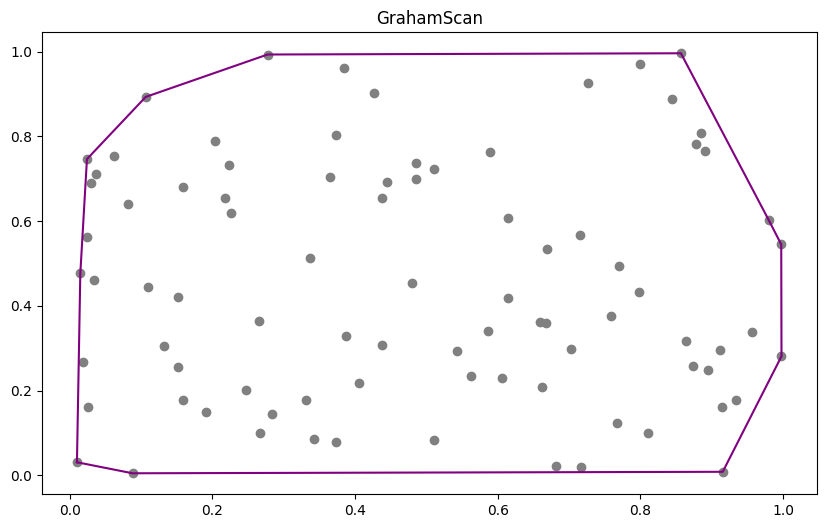

In [94]:
auxiliary_list = createSet(85)
convexHull = GrahamScan(auxiliary_list)
printConvexHull(convexHull)
plotting(convexHull, auxiliary_list, "GrahamScan")

$ $

**Αλγόριθμος ‘‘περιτυλίγματος’’ (Gift wrapping)**

---



(0.08819723885158759, 0.005121917109854102)
(0.9154957029338664, 0.008625057727973395)
(0.9978899599463192, 0.28110794935009675)
(0.9975282868395074, 0.5449711069005801)
(0.9797510462536426, 0.6031650698132945)
(0.856892398205928, 0.9958295313710828)
(0.2774965994213844, 0.9929411955466686)
(0.10659738632441573, 0.8928723892687994)
(0.02424536517655429, 0.7461965343320632)
(0.014944131389534654, 0.47644294727742065)
(0.010229507615277078, 0.031121854774366242)


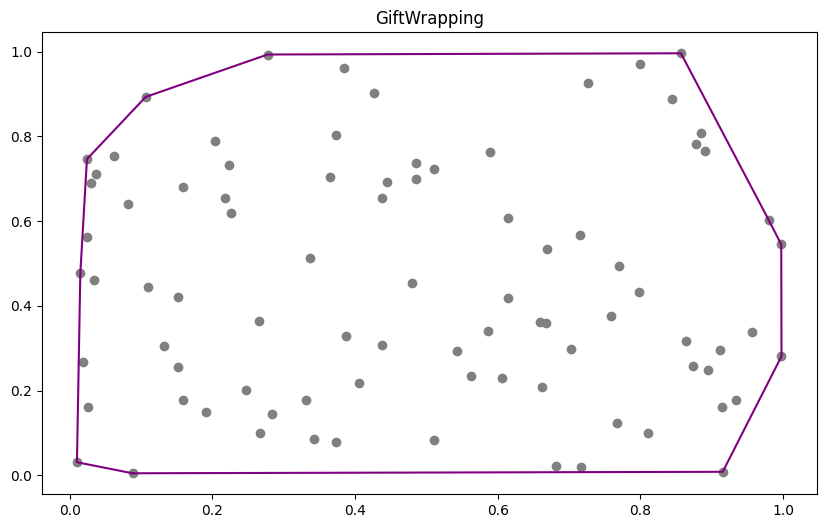

In [95]:
convexHull = GiftWrapping(auxiliary_list)
printConvexHull(convexHull)
plotting(convexHull, auxiliary_list, "GiftWrapping")

$ $

**(βʹ)** Να γίνει οπτικοποίηση των βημάτων ενός αλγορίθμου από τους παραπάνω για την κατασκευή του κυρτού περιβλήματος.


Input: [(0.5867281935858955, 0.3401764847133385), (0.28363519164217654, 0.14448128329546206), (0.4055874698001638, 0.21823588186349363), (0.02424536517655429, 0.7461965343320632), (0.4797835987696575, 0.4539327173850307), (0.029995397906041332, 0.6905232869524108), (0.037290708419553176, 0.7117007276146636), (0.5102340145287189, 0.7233357998669877), (0.8445241816724688, 0.8880725533127524), (0.1524759342395582, 0.4206153696634395), (0.6587851438285232, 0.36203011309000155), (0.08181906827964303, 0.639463437292789), (0.8784914404198655, 0.7822257620774619), (0.8731841981093758, 0.2592018122471328), (0.4453129338400651, 0.6912048673727575), (0.5629422128854431, 0.2344031515586683), (0.7699500178069665, 0.493427722051617), (0.8850960927040332, 0.8084402632875232), (0.6697629425528053, 0.535283066362863), (0.4265298412575914, 0.9019437837331529), (0.010229507615277078, 0.031121854774366242), (0.9154957029338664, 0.008625057727973395), (0.025065769780541536, 0.16134822063111398), (0.062659

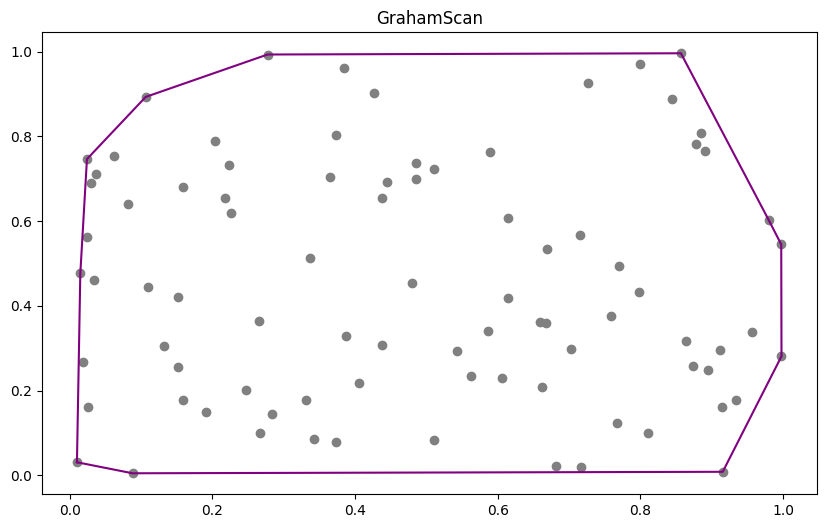

In [96]:
# -- GrahamScan --
auxiliary_list = createSet(85)
convexHull = GrahamScan(auxiliary_list, visualization = True)
printConvexHull(convexHull)
plotting(convexHull, auxiliary_list, "GrahamScan")

$ $

$ $

3. $ $ Θεωρώντας διάφορα πλήθη σημείων στο επίπεδο, να συγκρίνετε τους δύο
παραπάνω αλγορίθμους με βάση το χρόνο υλοποίησής τους και την ποιότητα των αποτελεσμάτων που εξήχθησαν.



 -- GrahamScan - 10 --

(0.02424536517655429, 0.7461965343320632)
(0.8445241816724688, 0.8880725533127524)
(0.5867281935858955, 0.3401764847133385)
(0.4055874698001638, 0.21823588186349363)
(0.28363519164217654, 0.14448128329546206)
(0.1524759342395582, 0.4206153696634395)
(0.029995397906041332, 0.6905232869524108)



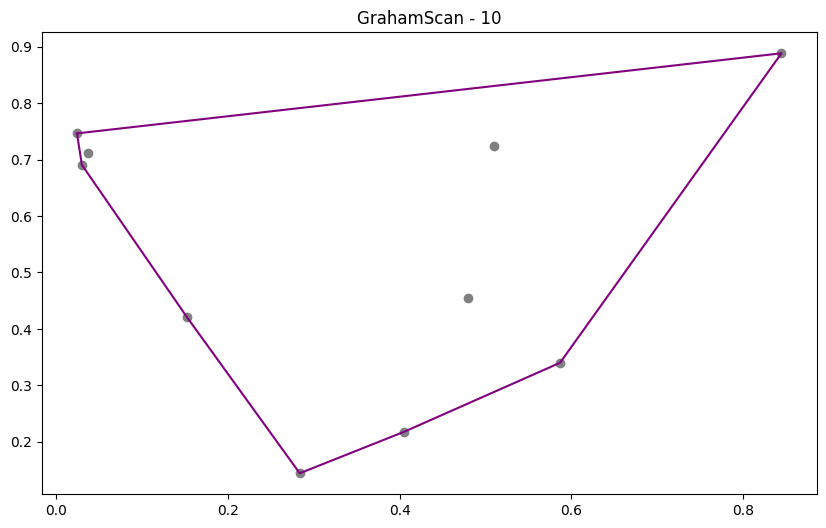



 -- GiftWrapping - 10 --

(0.28363519164217654, 0.14448128329546206)
(0.4055874698001638, 0.21823588186349363)
(0.5867281935858955, 0.3401764847133385)
(0.8445241816724688, 0.8880725533127524)
(0.02424536517655429, 0.7461965343320632)
(0.029995397906041332, 0.6905232869524108)
(0.1524759342395582, 0.4206153696634395)



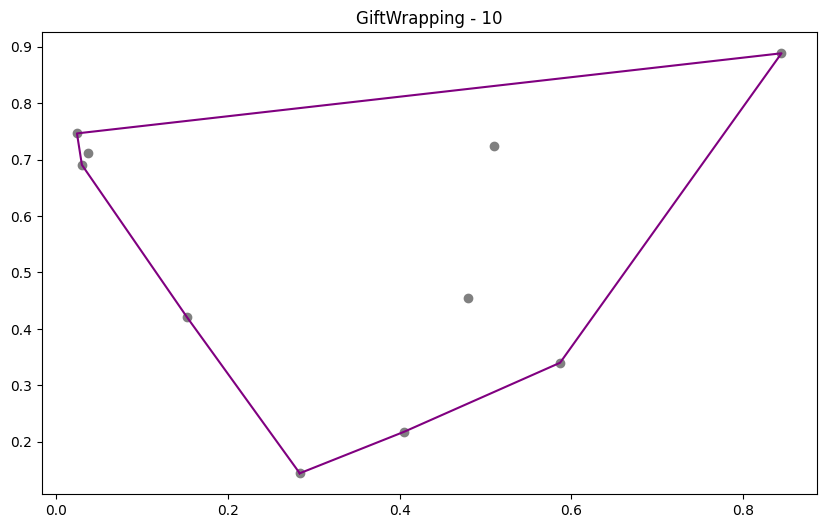



 -- GrahamScan - 100 --

(0.010229507615277078, 0.031121854774366242)
(0.014944131389534654, 0.47644294727742065)
(0.02424536517655429, 0.7461965343320632)
(0.10659738632441573, 0.8928723892687994)
(0.2774965994213844, 0.9929411955466686)
(0.856892398205928, 0.9958295313710828)
(0.9797510462536426, 0.6031650698132945)
(0.9975282868395074, 0.5449711069005801)
(0.9978899599463192, 0.28110794935009675)
(0.9154957029338664, 0.008625057727973395)
(0.08819723885158759, 0.005121917109854102)



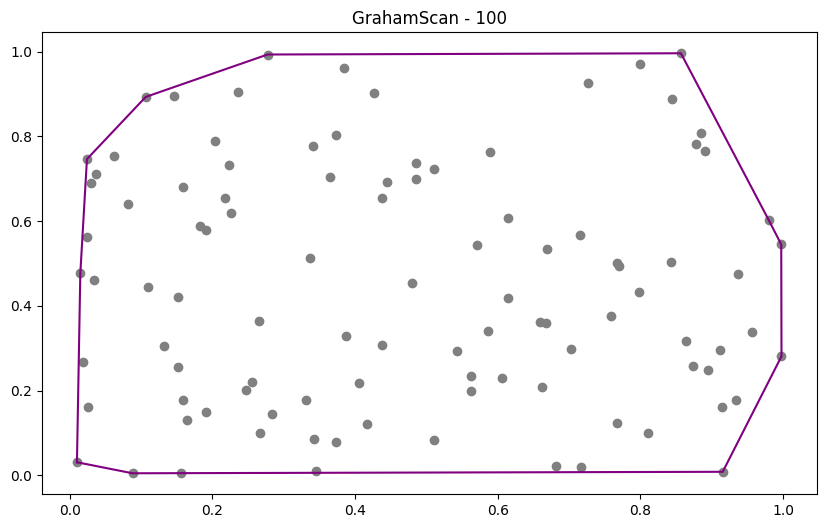



 -- GiftWrapping - 100 --

(0.08819723885158759, 0.005121917109854102)
(0.9154957029338664, 0.008625057727973395)
(0.9978899599463192, 0.28110794935009675)
(0.9975282868395074, 0.5449711069005801)
(0.9797510462536426, 0.6031650698132945)
(0.856892398205928, 0.9958295313710828)
(0.2774965994213844, 0.9929411955466686)
(0.10659738632441573, 0.8928723892687994)
(0.02424536517655429, 0.7461965343320632)
(0.014944131389534654, 0.47644294727742065)
(0.010229507615277078, 0.031121854774366242)



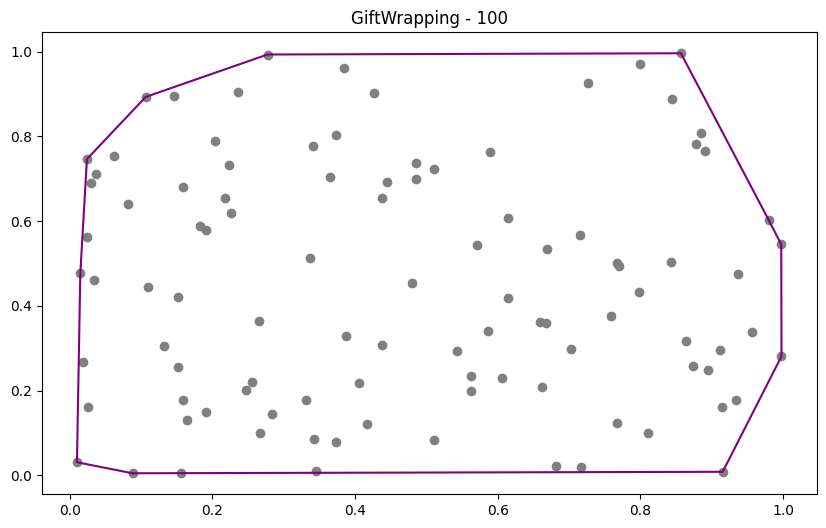



 -- GrahamScan - 1000 --

(0.0014412268624418578, 0.7302849593385676)
(0.01747977984500515, 0.9144232681458337)
(0.04112837579089579, 0.9919238980376207)
(0.08032700924631664, 0.9987549402134435)
(0.16175554420661387, 0.9993425657155219)
(0.856892398205928, 0.9958295313710828)
(0.9447201899745828, 0.9906150953676155)
(0.9707264286141783, 0.9875343709464318)
(0.9975180897100796, 0.8602903519905745)
(0.9997989220576339, 0.7110829403460642)
(0.9994680929474854, 0.5030772536537405)
(0.9978899599463192, 0.28110794935009675)
(0.9943677224598277, 0.0882086550648693)
(0.9881536043913232, 0.020625675985755487)
(0.9154957029338664, 0.008625057727973395)
(0.8827422438393133, 0.00607842332620967)
(0.4576684574043145, 0.0012745732526715514)
(0.08819723885158759, 0.005121917109854102)
(0.0015125174036224598, 0.008032351705980934)



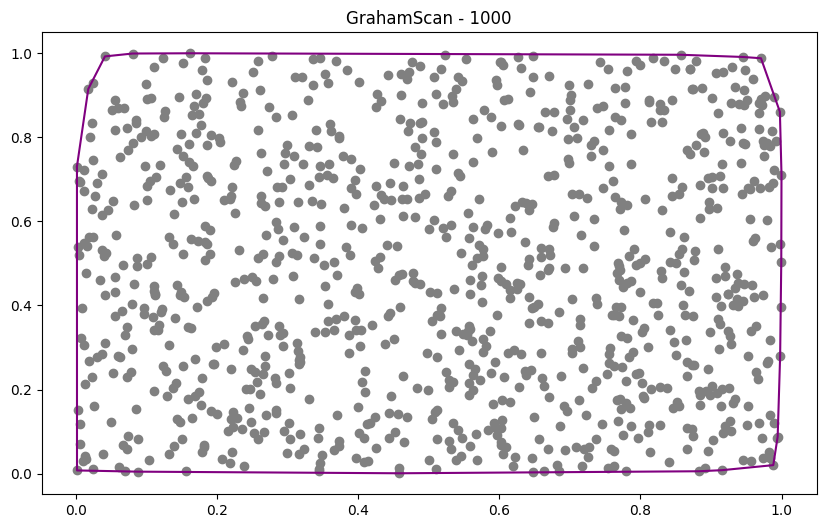



 -- GiftWrapping - 1000 --

(0.4576684574043145, 0.0012745732526715514)
(0.8827422438393133, 0.00607842332620967)
(0.9154957029338664, 0.008625057727973395)
(0.9881536043913232, 0.020625675985755487)
(0.9943677224598277, 0.0882086550648693)
(0.9978899599463192, 0.28110794935009675)
(0.9994680929474854, 0.5030772536537405)
(0.9997989220576339, 0.7110829403460642)
(0.9975180897100796, 0.8602903519905745)
(0.9707264286141783, 0.9875343709464318)
(0.9447201899745828, 0.9906150953676155)
(0.856892398205928, 0.9958295313710828)
(0.16175554420661387, 0.9993425657155219)
(0.08032700924631664, 0.9987549402134435)
(0.04112837579089579, 0.9919238980376207)
(0.01747977984500515, 0.9144232681458337)
(0.0014412268624418578, 0.7302849593385676)
(0.0015125174036224598, 0.008032351705980934)
(0.08819723885158759, 0.005121917109854102)



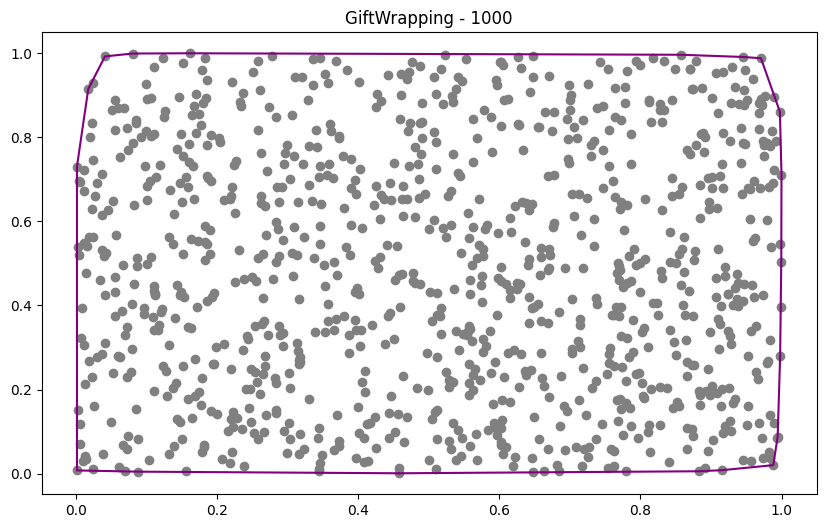



 -- GrahamScan - 10000 --

(2.289031880942094e-05, 0.21427802062016355)
(0.00022930271518561973, 0.9675503410031129)
(0.00878210179328387, 0.9940417213738887)
(0.08032700924631664, 0.9987549402134435)
(0.16175554420661387, 0.9993425657155219)
(0.43516089506279065, 0.9998301293145225)
(0.9259765904849072, 0.9998411511824589)
(0.9880200940576636, 0.9978267236602175)
(0.9894640705365423, 0.9948637421024753)
(0.9919068387010167, 0.986311754593384)
(0.9977685872585283, 0.9586293380820522)
(0.998544546010781, 0.8777957948563236)
(0.9991474196826902, 0.8085609082455965)
(0.9997989220576339, 0.7110829403460642)
(0.9997201415872935, 0.07699298424644052)
(0.9978520143392656, 0.05193706898201034)
(0.9965795242252365, 0.04138856316332329)
(0.9831269254698789, 0.002895887458741808)
(0.8969454499082465, 0.0009679369951234307)
(0.7208949806441427, 0.000238204900355643)
(0.3512526777351993, 0.0002050038583087943)
(0.15300471891461198, 0.0007622844899567438)
(0.07006467672013761, 0.001299611389605437

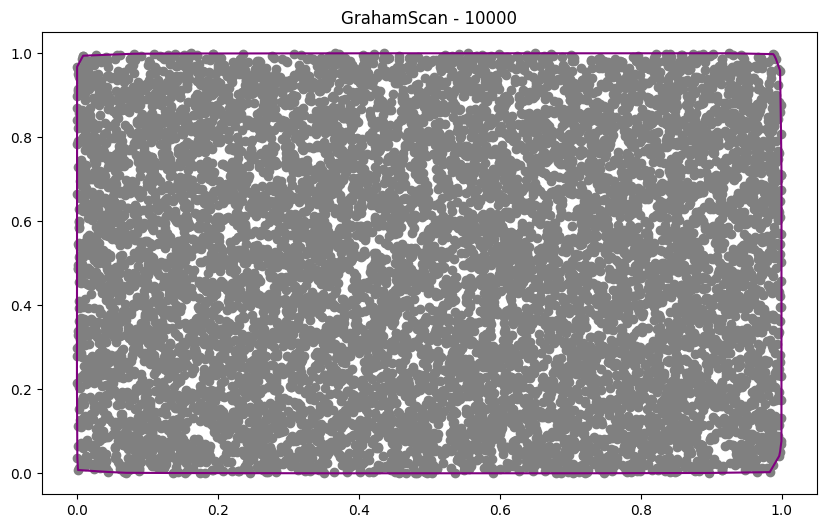



 -- GiftWrapping - 10000 --

(0.3512526777351993, 0.0002050038583087943)
(0.7208949806441427, 0.000238204900355643)
(0.8969454499082465, 0.0009679369951234307)
(0.9831269254698789, 0.002895887458741808)
(0.9965795242252365, 0.04138856316332329)
(0.9978520143392656, 0.05193706898201034)
(0.9997201415872935, 0.07699298424644052)
(0.9997989220576339, 0.7110829403460642)
(0.9991474196826902, 0.8085609082455965)
(0.998544546010781, 0.8777957948563236)
(0.9977685872585283, 0.9586293380820522)
(0.9919068387010167, 0.986311754593384)
(0.9894640705365423, 0.9948637421024753)
(0.9880200940576636, 0.9978267236602175)
(0.9259765904849072, 0.9998411511824589)
(0.43516089506279065, 0.9998301293145225)
(0.16175554420661387, 0.9993425657155219)
(0.08032700924631664, 0.9987549402134435)
(0.00878210179328387, 0.9940417213738887)
(0.00022930271518561973, 0.9675503410031129)
(2.289031880942094e-05, 0.21427802062016355)
(0.0005708102114686531, 0.03733579343500648)
(0.0015125174036224598, 0.00803235170598

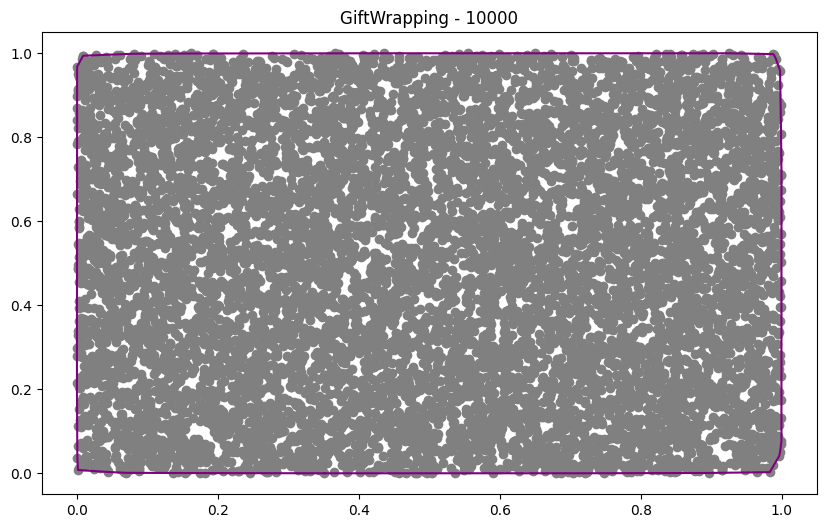

In [109]:
L10 = []
L100 = []
L1000 = []
L10000 = []

for elements in [10, 100, 1000, 10000]:

  auxiliary_list = createSet(elements)

  print(f"\n\n -- GrahamScan - {elements} --\n")
  startTime = time.time()
  convexHull = GrahamScan(auxiliary_list)
  printConvexHull(convexHull)
  print()
  plotting(convexHull, auxiliary_list, f"GrahamScan - {elements}")
  endTime = time.time()

  total = endTime-startTime

  if elements == 10:
    L10.append(total)
  elif elements == 100:
    L100.append(total)
  elif elements == 1000:
    L1000.append(total)
  elif elements == 10000:
    L10000.append(total)

  print(f"\n\n -- GiftWrapping - {elements} --\n")
  startTime = time.time()
  convexHull = GiftWrapping(auxiliary_list)
  printConvexHull(convexHull)
  print()
  plotting(convexHull, auxiliary_list, f"GiftWrapping - {elements}")
  endTime = time.time()

  total = endTime-startTime

  if elements == 10:
    L10.append(total)
  elif elements == 100:
    L100.append(total)
  elif elements == 1000:
    L1000.append(total)
  elif elements == 10000:
    L10000.append(total)


In [110]:
df = pd.DataFrame({'ConvexHull Algorithms': ['Graham’s Scan', 'GiftWrapping'],
                   '10': L10,
                   '100': L100,
                   '1000': L1000,
                   '10000': L10000})

df.set_index('ConvexHull Algorithms')

,10,100,1000,10000
ConvexHull Algorithms,,,,
Graham’s Scan,0.240206,0.223689,0.239756,0.317459
GiftWrapping,0.244966,0.225482,0.394522,0.592412


$ $

$ $

Με βάση τα πειραματικά αποτελέσματα, φαίνεται ότι ο αλγόριθμος Graham's Scan έχει καλύτερη απόδοση χρόνου σε σύγκριση με τον αλγόριθμο Gift Wrapping. Επίσης, αξίζει να σημειωθεί ότι η απόδοση του Graham's Scan φαίνεται να είναι πιο σταθερή καθώς ο αριθμός των σημείων αυξάνεται, ενώ ο αλγόριθμος Gift Wrapping φαίνεται να έχει αυξημένο χρόνο εκτέλεσης όσο μεγαλώνει το πλήθος των σημείων.

Όσον αφορά την ποιότητα των αποτελεσμάτων, οι δύο αλγόριθμοι προκύπτει ότι παράγουν το ίδιο κυρτό περίβλημα.

Όσον αφορά την πολυπλοκότητα, η πολυπλοκότητα του Graham's Scan είναι O(n log n), ενώ η πολυπλοκότητα του Gift Wrapping είναι O(nh), όπου n είναι ο αριθμός των σημείων και h είναι ο αριθμός των κορυφών στο κυρτό περίβλημα. Συνεπώς, ο Graham's Scan έχει την τάση να εκτελείται γρηγορότερα, ειδικά για μεγάλα σύνολα σημείων, λόγω της καλύτερης πολυπλοκότητάς του.

$ $

## Υλοποίηση B: Γεωμετρική αναζήτηση

΄Εστω P ένα σύνολο n σημείων στο επίπεδο. Να υλοποιήσετε έναν αλγόριθμο
ορθογώνιας γεωμετρικής αναζήτησης για το σύνολο σημείων P.


In [ ]:
class KDNode:
  def __init__(self, point, left=None, right=None):
    self.left = left
    self.right = right
    self.point = point


def kdTree(points: list,  depth: int = 0):

  if len(points) == 1:  return KDNode(points[0])
  if len(points) > 1:

    # Επιλογή του άξονα βάσει του βάθους
    axis = depth % 2  # όπου 2 είναι η διάσταση των σημείων

    # Ταξινόμηση των σημείων βάσει του επιλεγμένου άξονα
    points.sort(key=lambda point: point[axis])

    # Εύρεση του μεσαίου σημείου
    median_index = len(points) // 2
    median_point = points[median_index]

    P1 = points[:median_index]
    P2 = points[median_index + 1:]

    return KDNode(median_point, kdTree(P1, depth + 1), kdTree(P2, depth + 1))


def pointsContainedRectangle(current_node: KDNode, rectangle: tuple,  depth: int = 0, points: list = [])-> list:

  if current_node is None: return points

  x_min = rectangle[0]
  y_min = rectangle[1]
  x_max = rectangle[2]
  y_max = rectangle[3]

  x = current_node.point[0]
  y = current_node.point[1]

  if (x_min <= x <= x_max) and (y_min <= y <= y_max): points.append(current_node.point)

  # Έλεγχος των υποδέντρων
  if (x >= x_min) or (y >= y_min):
    pointsContainedRectangle(current_node.left, rectangle, depth+1, points)

  if (x <= x_max) or (y <= y_max):
    pointsContainedRectangle(current_node.right, rectangle, depth+1, points)


  return points

def plot_kdTree_rectangle(points, kd_tree, points_contained_rec, rectangle):

  x_coords = [point[0] for point in points]
  y_coords = [point[1] for point in points]

  plt.plot(x_coords, y_coords, 'o', color='black')

  x_min = rectangle[0]
  y_min = rectangle[1]
  x_max = rectangle[2]
  y_max = rectangle[3]

  plt.plot([x_min, x_max, x_max, x_min, x_min],
           [y_min, y_min, y_max, y_max, y_min],
           'red'
           )

  if len(points_contained_rec) > 0:
    x_coords_contained = [point[0] for point in points_contained_rec]
    y_coords_contained = [point[1] for point in points_contained_rec]
    plt.plot(x_coords_contained, y_coords_contained, 'go')
  plt.title('KD-Tree with rectangle')

  plt.show()

#### Εφαρμογή Β.


Θεωρείστε ένα σύνολο P 85 σημείων στο επίπεδο και μία ορθογώνια έκταση.
Εφαρμόζοντας τον αλγόριθμο της επιλογής σας να καταγράψετε ποια από τα
σημεία του P βρίσκονται εντός της ορθογώνιας έκτασης.


85

Points contained in the rectangle:
 [[1 4]
 [3 6]]



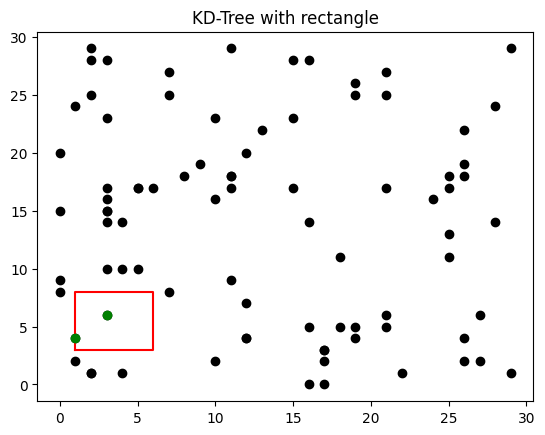

In [ ]:
np.random.seed(318)
points = [(x, y) for x, y in np.random.randint(0, 30, (85, 2))]

print(len(points))

# κατασκευή δέντρου
kd = kdTree(points)

# ορθογώνιας έκταση
rectangle = (1, 3, 6, 8)

# εύρεση σημείων που βρίκκονται εντός ή πάνω της ορθογώνιας έκτασης
points_contained_rec = pointsContainedRectangle(kd, rectangle)
print(f"\nPoints contained in the rectangle:\n {np.array(points_contained_rec)}\n")

# απεικόνιση
plot_kdTree_rectangle(points, kd, points_contained_rec, rectangle)

#### Εφαρμογή Γ: Τριγωνοποίηση Delaunay

1. Να υλοποιήσετε έναν αλγόριθμο για την τριγωνοποίηση Delaunay σε ένα
σύνολο n σημείων στο επίπεδο.
2. Θεωρώντας n = 90 να απεικονίσετε την τριγωνοποίηση Delaunay.

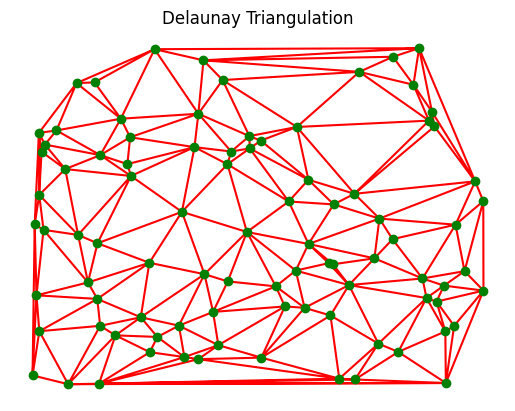

In [ ]:
points = createSet(90)

triang = Delaunay(points)

x_coords = [point[0] for point in points]
y_coords = [point[1] for point in points]

plt.triplot(x_coords, y_coords, triang.simplices, color='red')
plt.plot(x_coords, y_coords, 'go')

plt.axis('off')
plt.title('Delaunay Triangulation')
plt.show()

$ $

#### Εφαρμογή Δ.

Επιλέξτε έναν από τους αλγορίθμους που παρουσιάστηκαν στο μάθημα και
εφαρμόστε τον σε μία πραγματική εφαρμογή που επιθυμείτε.

**Επιλεγμένος αλγόριθμος**: kd-tree

$ $

Ο kd-tree είναι ένα ισορροπημένο δυαδικό δέντρο χωρισμού που χρησιμοποιείται για να οργανώσει πολυδιάστατα δεδομένα. Η χρήση του είναι σημαντική στους τομείς ανάκτησης πληροφορίας και της μηχανικής μάθησης.

Μία πραγματική εφαρμογή του kd-tree είναι στα συστήματα πληροφοριών γεωγραφικών πληροφοριών (GIS), όπου το kd-tree μπορεί να χρησιμοποιηθεί για την αναζήτηση κοντινών τοποθεσιών (διευθύνσεις ή γεωγραφικές συντεταγμένες) σε έναν χάρτη βάσει των γεωγραφικών τους συντεταγμένων.Έτσι χρησιμοποιώντας ένα kd-tree μπορούμε να εντοπίσουμε γρήγορα τις πιο κοντινές διευθύνσεις σε ένα μεγάλο σύνολο δεδομένων. Πιο αναλυτικά, ας εξετάσουμε πώς χρησιμοποιούνται και τι επιτυγχάνουν:

1. **Αναζήτηση Κοντινότερου Γείτονα**:
Αν έχουμε μια βάση δεδομένων με γεωγραφικά σημεία (όπως σημεία ενδιαφέροντος, συστήματα GPS, κ.λπ.), μπορούμε να χρησιμοποιήσουμε kd-tree για να βρούμε τον κοντινότερο γείτονα ενός συγκεκριμένου σημείου. Αυτό είναι χρήσιμο για εφαρμογές όπως τον υπολογισμό διαδρομών, την αναζήτηση κοντινών σημείων ενδιαφέροντος.

2. **Εύρος Σημείων**:
Τα kd-tree μπορούν να χρησιμοποιηθούν για την αναζήτηση σημείων που βρίσκονται εντός ενός συγκεκριμένου εύρους.Αν έχουμε μια περιοχή ενδιαφέροντος (π.χ. ένα πολύγωνο), μπορούμε να χρησιμοποιήσουμε ένα kd-tree για να εντοπίσουμε τα σημεία που βρίσκονται εντός αυτής της περιοχής. Αυτό είναι χρήσιμο για εφαρμογές όπως η ανίχνευση σημείων εντός γεωγραφικών περιοχών.

Τέλος, το kd-tree χρησιμοποιείται ευρέως σε εφαρμογές που αφορούν την αναζήτηση σημείων σε πολυδιάστατους χώρους, όπως στην αναζήτηση κοντινότερων γειτόνων ([kNN - k Nearest Neighbors](https://docs.google.com/document/d/1R2mxtVBfdNuP_sS96S0fUVLAGbWgAO5p5qmkPVZFc7I/edit?usp=sharing)) σε συστήματα ανάκτησης πληροφοριών ή σε αναγνώριση προτύπων.

<img src="https://drive.google.com/uc?id=1_EmyWWg6nhBzbgWnfgj2YWKSz1yGxj1n" alt="uoa" width="450" height="300">
$\hspace{10mm}$ <img src="https://drive.google.com/uc?id=1Kxm7gT91TQiXTTcKx2sjuFwKUuQ0Ola7" alt="uoa" width="500" height="350">

